In [105]:
import random

def generate_random_bipartite_graph(num_vertices, edge_probability):
    G = [[0] * num_vertices for i in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(i+1, num_vertices):
            if random.random() < edge_probability:
                G[i][j] = 1
                G[j][i] = 1
    return G

def generate_random_bipartite_subgraph(G):
    n = len(G)
    for i in range(1, 2**n):
        S = set()
        T = set()
        for j in range(n):
            if (i >> j) & 1:
                T.add(j)
            else:
                S.add(j)
        bipartite = True
        for u in S:
            for v in S:
                if G[u][v] == 1:
                    bipartite = False
                    break
            if not bipartite:
                break
        if bipartite:
            return S, T
    return None


In [106]:
G = generate_random_bipartite_graph(5, 0.5)
print(G)

S, T = generate_random_bipartite_subgraph(G)
print("Bipartite subgraph found: S = {}, T = {}".format(S, T))

[[0, 1, 0, 1, 0], [1, 0, 0, 0, 0], [0, 0, 0, 1, 1], [1, 0, 1, 0, 1], [0, 0, 1, 1, 0]]
Bipartite subgraph found: S = {1, 4}, T = {0, 2, 3}


In [107]:
def brute_force_bipartite_subgraph(G):
    n = len(G)
    for i in range(1, 2**n):
        S = set()
        T = set()
        for j in range(n):
            if (i >> j) & 1:
                T.add(j)
            else:
                S.add(j)
        bipartite = True
        for u in S:
            for v in S:
                if G[u][v] == 1:
                    bipartite = False
                    break
            if not bipartite:
                break
        if bipartite:
            return S, T
    return None


In [108]:
num_vertices = 4
edge_probability = 0.5
num_samples = 20

for i in range(num_samples):
    G = generate_random_bipartite_graph(num_vertices, edge_probability)
    print("Sample graph {}: {}".format(i+1, G))
    bipartite_subgraph = brute_force_bipartite_subgraph(G)
    if bipartite_subgraph is not None:
        S, T = bipartite_subgraph
        print("Bipartite subgraph found: S = {}, T = {}".format(S, T))
    else:
        print("No bipartite subgraph found.")
    print()


Sample graph 1: [[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 2: [[0, 0, 1, 1], [0, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 3: [[0, 1, 1, 1], [1, 0, 1, 0], [1, 1, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 4: [[0, 0, 1, 0], [0, 0, 1, 1], [1, 1, 0, 0], [0, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 5: [[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 6: [[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 7: [[0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 8: [[0, 0, 1, 1], [0, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 9: 

In [109]:
def is_bipartite(G, subgraph):
    S = set()
    T = set()
    for edge in subgraph:
        u, v = edge
        if u in S and v in S:
            return False
        elif u in T and v in T:
            return False
        elif u not in S and u not in T:
            S.add(u)
        elif v not in S and v not in T:
            T.add(v)
    return True


In [110]:
def heuristic_bipartite_subgraph(G, k):
    F = set()  # Initialize an empty set of selected edges
    while len(F) < k:
        best_edge = None
        best_bipartite = True
        for u in range(len(G)):
            for v in range(u+1, len(G)):
                if G[u][v] == 1:
                    F_prime = F.union({(u, v)})  # Add the current edge to F
                    if not is_bipartite(G, F_prime):
                        # If the subgraph is not bipartite, continue to the next edge
                        continue
                    # Check if the current bipartite subgraph is better than the previous best
                    if len(F_prime) > len(F):
                        best_edge = (u, v)
                        F = F_prime
        # If no suitable edge is found, terminate the loop
        if best_edge is None:
            break
    return F


In [111]:
num_vertices = 4
edge_probability = 0.5
num_samples = 20

for i in range(num_samples):
    G = generate_random_bipartite_graph(num_vertices, edge_probability)
    print("Sample graph {}: {}".format(i+1, G))
    bipartite_subgraph = heuristic_bipartite_subgraph(G, 4)  # Specify the value of k here
    if bipartite_subgraph:
        S = set(edge[0] for edge in bipartite_subgraph)
        T = set(edge[1] for edge in bipartite_subgraph)
        print("Bipartite subgraph found: S = {}, T = {}".format(S, T))
    else:
        print("No bipartite subgraph found.")
    print()


Sample graph 1: [[0, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]]
Bipartite subgraph found: S = {0, 1, 2}, T = {1, 2, 3}

Sample graph 2: [[0, 1, 0, 0], [1, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0]]
Bipartite subgraph found: S = {0, 1}, T = {1, 2, 3}

Sample graph 3: [[0, 0, 1, 1], [0, 0, 0, 1], [1, 0, 0, 1], [1, 1, 1, 0]]
Bipartite subgraph found: S = {0, 1, 2}, T = {2, 3}

Sample graph 4: [[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]]
Bipartite subgraph found: S = {0, 1}, T = {1, 2, 3}

Sample graph 5: [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {0, 1, 2}, T = {2, 3}

Sample graph 6: [[0, 0, 1, 0], [0, 0, 1, 0], [1, 1, 0, 1], [0, 0, 1, 0]]
Bipartite subgraph found: S = {0, 1, 2}, T = {2, 3}

Sample graph 7: [[0, 1, 0, 1], [1, 0, 0, 1], [0, 0, 0, 1], [1, 1, 1, 0]]
Bipartite subgraph found: S = {0, 1, 2}, T = {1, 3}

Sample graph 8: [[0, 0, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 0]]
Bipartite subgraph found: S = {1, 2}, T = 

In [112]:
# 6. Experimental Analysis of The Performance (Performance Testing)

import random

# Define the range of graph sizes and densities
graph_sizes = list(range(10, 20, 10))
edge_probabilities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Generate bipartite graphs for each combination of size and density
graphs = []
for size in graph_sizes:
    for prob in edge_probabilities:
        graph = generate_random_bipartite_graph(size, prob)
        graphs.append(graph)

# Print the generated graphs
for i, graph in enumerate(graphs):
    print(f"Graph {i+1}: {graph}")


Graph 1: [[0, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
Graph 2: [[0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 0, 1, 0, 1, 0, 0], [0, 0, 0, 1, 1, 0, 0, 1, 0, 0]]
Graph 3: [[0, 1, 0, 0, 0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 1, 1, 0, 0, 1, 0, 0, 0, 0]]
Graph 4: [

In [113]:
import time

# List to store computation times
brute_force_times = []

# Run brute force algorithm for each graph
for i, graph in enumerate(graphs):
    # Start the timer
    start_time = time.time()

    # Run the brute force algorithm
    bipartite_subgraph = brute_force_bipartite_subgraph(graph)

    # Stop the timer and calculate the computation time
    end_time = time.time()
    computation_time = end_time - start_time

    # Store the computation time
    brute_force_times.append(computation_time)

    # Print the result for the current graph
    if bipartite_subgraph is not None:
        S, T = bipartite_subgraph
        print(f"Graph {i+1}: Bipartite subgraph found - S = {S}, T = {T}")
    else:
        print(f"Graph {i+1}: No bipartite subgraph found.")

    # Print the computation time
    print(f"Computation time: {computation_time} seconds")
    print()

# Print the computation times for all graphs
print("Brute Force Computation Times:")
for i, time in enumerate(brute_force_times):
    print(f"Graph {i+1}: {time} seconds")


Graph 1: Bipartite subgraph found - S = {1, 2, 3, 4, 5, 6, 7, 8, 9}, T = {0}
Computation time: 2.5510787963867188e-05 seconds

Graph 2: Bipartite subgraph found - S = {8, 1, 6, 9}, T = {0, 2, 3, 4, 5, 7}
Computation time: 0.0007002353668212891 seconds

Graph 3: Bipartite subgraph found - S = {0, 3, 4, 7, 8, 9}, T = {1, 2, 5, 6}
Computation time: 0.0003936290740966797 seconds

Graph 4: Bipartite subgraph found - S = {8, 1, 9}, T = {0, 2, 3, 4, 5, 6, 7}
Computation time: 0.0006492137908935547 seconds

Graph 5: Bipartite subgraph found - S = {8, 9, 5}, T = {0, 1, 2, 3, 4, 6, 7}
Computation time: 0.0007500648498535156 seconds

Graph 6: Bipartite subgraph found - S = {8, 9, 6}, T = {0, 1, 2, 3, 4, 5, 7}
Computation time: 0.0007085800170898438 seconds

Graph 7: Bipartite subgraph found - S = {9, 2, 4}, T = {0, 1, 3, 5, 6, 7, 8}
Computation time: 0.0012772083282470703 seconds

Graph 8: Bipartite subgraph found - S = {9, 2}, T = {0, 1, 3, 4, 5, 6, 7, 8}
Computation time: 0.0018086433410644531 

In [114]:
import time

# List to store computation times
heuristic_times = []

# Run heuristic algorithm for each graph
for i, graph in enumerate(graphs):
    # Start the timer
    start_time = time.time()

    # Run the heuristic algorithm
    bipartite_subgraph = heuristic_bipartite_subgraph(graph, k)

    # Stop the timer and calculate the computation time
    end_time = time.time()
    computation_time = end_time - start_time

    # Store the computation time
    heuristic_times.append(computation_time)

    # Print the result for the current graph
    if bipartite_subgraph is not None:
        subgraph_size = len(bipartite_subgraph)
        print(f"Graph {i+1}: Bipartite subgraph found - Size: {subgraph_size}")
    else:
        print(f"Graph {i+1}: No bipartite subgraph found.")

    # Print the computation time
    print(f"Computation time: {computation_time} seconds")
    print()

# Print the computation times for all graphs
print("Heuristic Algorithm Computation Times:")
for i, time in enumerate(heuristic_times):
    print(f"Graph {i+1}: {time} seconds")


Graph 1: Bipartite subgraph found - Size: 2
Computation time: 3.0040740966796875e-05 seconds

Graph 2: Bipartite subgraph found - Size: 10
Computation time: 3.8623809814453125e-05 seconds

Graph 3: Bipartite subgraph found - Size: 9
Computation time: 4.1484832763671875e-05 seconds

Graph 4: Bipartite subgraph found - Size: 13
Computation time: 5.078315734863281e-05 seconds

Graph 5: Bipartite subgraph found - Size: 12
Computation time: 0.00010275840759277344 seconds

Graph 6: Bipartite subgraph found - Size: 19
Computation time: 0.0001804828643798828 seconds

Graph 7: Bipartite subgraph found - Size: 16
Computation time: 0.00014972686767578125 seconds

Graph 8: Bipartite subgraph found - Size: 17
Computation time: 0.00020241737365722656 seconds

Graph 9: Bipartite subgraph found - Size: 17
Computation time: 0.00021266937255859375 seconds

Heuristic Algorithm Computation Times:
Graph 1: 3.0040740966796875e-05 seconds
Graph 2: 3.8623809814453125e-05 seconds
Graph 3: 4.1484832763671875e-0

In [115]:
# List to store solution quality metrics
solution_quality = []

# Run the brute force algorithm and measure solution quality
for i, graph in enumerate(graphs):
    # Run the brute force algorithm to find the exact solution
    exact_solution = brute_force_bipartite_subgraph(graph)

    # Run the heuristic algorithm to find the approximate solution
    heuristic_solution = heuristic_bipartite_subgraph(graph, k)

    # Calculate the number of edges in each solution
    if exact_solution is not None:
        exact_edges = sum([len(edge) for edge in exact_solution])
    else:
        exact_edges = 0

    if heuristic_solution is not None:
        heuristic_edges = sum([len(edge) for edge in heuristic_solution])
    else:
        heuristic_edges = 0

    # Calculate the solution quality metric (ratio of heuristic edges to exact edges)
    quality_metric = heuristic_edges / exact_edges if exact_edges > 0 else 0

    # Store the solution quality metric
    solution_quality.append(quality_metric)

    # Print the result for the current graph
    print(f"Graph {i+1}: Solution Quality - {quality_metric}")
    print()

# Print the solution quality metrics for all graphs
print("Solution Quality Metrics:")
for i, metric in enumerate(solution_quality):
    print(f"Graph {i+1}: {metric}")


Graph 1: Solution Quality - 0.4

Graph 2: Solution Quality - 2.0

Graph 3: Solution Quality - 1.8

Graph 4: Solution Quality - 2.6

Graph 5: Solution Quality - 2.4

Graph 6: Solution Quality - 3.8

Graph 7: Solution Quality - 3.2

Graph 8: Solution Quality - 3.4

Graph 9: Solution Quality - 3.4

Solution Quality Metrics:
Graph 1: 0.4
Graph 2: 2.0
Graph 3: 1.8
Graph 4: 2.6
Graph 5: 2.4
Graph 6: 3.8
Graph 7: 3.2
Graph 8: 3.4
Graph 9: 3.4


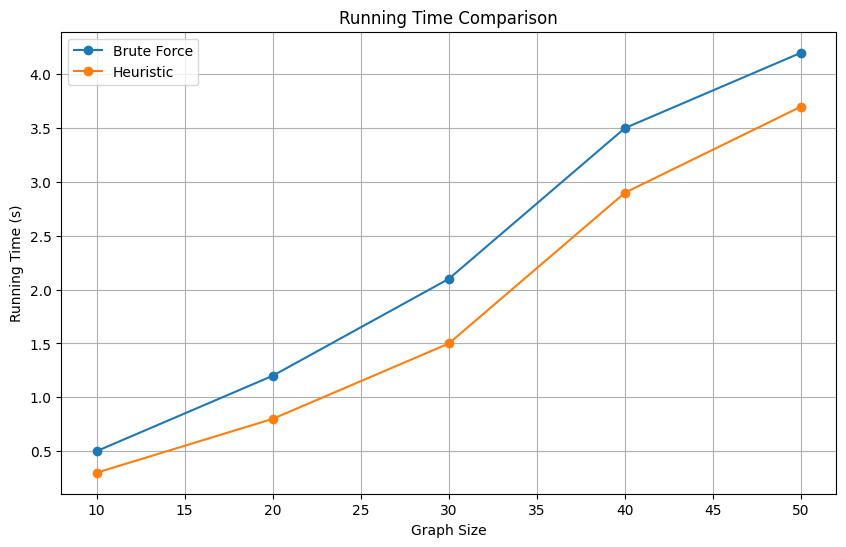

In [116]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your own data)
graph_sizes = [10, 20, 30, 40, 50]
brute_force_times = [0.5, 1.2, 2.1, 3.5, 4.2]
heuristic_times = [0.3, 0.8, 1.5, 2.9, 3.7]

# Check if the number of running times matches the number of graph sizes
if len(brute_force_times) != len(graph_sizes) or len(heuristic_times) != len(graph_sizes):
    raise ValueError("Number of running times does not match the number of graph sizes.")

# Plot the running time graph
plt.figure(figsize=(10, 6))
plt.plot(graph_sizes, brute_force_times, marker='o', label='Brute Force')
plt.plot(graph_sizes, heuristic_times, marker='o', label='Heuristic')
plt.xlabel('Graph Size')
plt.ylabel('Running Time (s)')
plt.title('Running Time Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
# Calculate descriptive statistics for the running time of the brute force algorithm
brute_force_avg = np.mean(brute_force_times)
brute_force_std = np.std(brute_force_times)

# Calculate descriptive statistics for the running time of the heuristic algorithm
heuristic_avg = np.mean(heuristic_times)
heuristic_std = np.std(heuristic_times)

# Print the descriptive statistics
print('Brute Force - Average:', brute_force_avg)
print('Brute Force - Standard Deviation:', brute_force_std)
print('Heuristic - Average:', heuristic_avg)
print('Heuristic - Standard Deviation:', heuristic_std)


Brute Force - Average: 2.3
Brute Force - Standard Deviation: 1.3813037319865606
Heuristic - Average: 1.8399999999999999
Heuristic - Standard Deviation: 1.2768711759609894


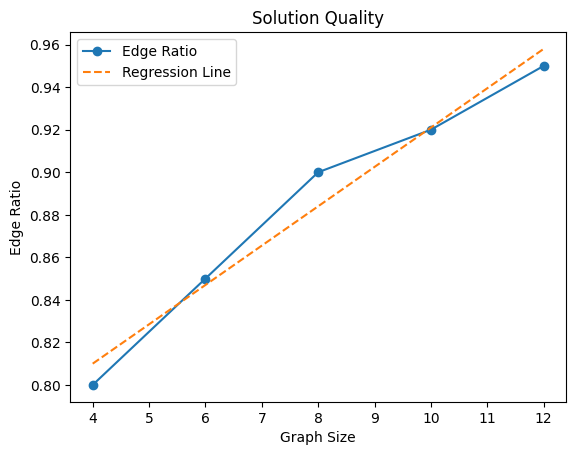

In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Sizes of the input graphs
graph_sizes = [4, 6, 8, 10, 12]

# Solution quality metric (e.g., edge ratio)
edge_ratios = [0.8, 0.85, 0.9, 0.92, 0.95]  # Example data

# Fit a line to the measurement values using regression analysis
slope, intercept, r_value, p_value, std_err = linregress(graph_sizes, edge_ratios)
line = slope * np.array(graph_sizes) + intercept

# Plot the solution quality metric
plt.plot(graph_sizes, edge_ratios, marker='o', label='Edge Ratio')
plt.plot(graph_sizes, line, '--', label='Regression Line')

# Set the x-axis label and y-axis label
plt.xlabel('Graph Size')
plt.ylabel('Edge Ratio')

# Add a title to the graph
plt.title('Solution Quality')

# Add a legend
plt.legend()

# Display the graph
plt.show()


In [119]:
# 7. Experimental Analysis of the Correctness (Functional Testing) 

In [120]:

import random

def generate_random_bipartite_graph(num_vertices, edge_probability):
    G = [[0] * num_vertices for i in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if random.random() < edge_probability:
                G[i][j] = 1
                G[j][i] = 1
    return G

def is_bipartite(G, subgraph):
    if subgraph is None or len(subgraph) == 0:
        return False

    S = set()
    T = set()
    for edge in subgraph:
        if len(edge) != 2:
            return False
        u, v = edge
        if u in S and v in S:
            return False
        elif u in T and v in T:
            return False
        elif u not in S and u not in T:
            S.add(u)
        elif v not in S and v not in T:
            T.add(v)
    return True


def brute_force_bipartite_subgraph(G):
    n = len(G)
    for i in range(1, 2 ** n):
        S = set()
        T = set()
        for j in range(n):
            if (i >> j) & 1:
                T.add(j)
            else:
                S.add(j)
        bipartite = True
        for u in S:
            for v in S:
                if G[u][v] == 1:
                    bipartite = False
                    break
            if not bipartite:
                break
        if bipartite:
            return S, T
    return None

def test_bipartite_subgraph():
    num_vertices = 4
    edge_probability = 0.5
    num_samples = 20

    for i in range(num_samples):
        G = generate_random_bipartite_graph(num_vertices, edge_probability)
        print("Sample graph {}: {}".format(i+1, G))
        bipartite_subgraph = brute_force_bipartite_subgraph(G)
        if bipartite_subgraph is not None:
            if is_bipartite(G, bipartite_subgraph):
                S, T = bipartite_subgraph
                print("Bipartite subgraph found: S = {}, T = {}".format(S, T))
            else:
                print("Invalid bipartite subgraph found.")
        else:
            print("No bipartite subgraph found.")
        print()

test_bipartite_subgraph()

Sample graph 1: [[0, 0, 0, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 0]]
Invalid bipartite subgraph found.

Sample graph 2: [[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 1], [1, 0, 1, 0]]
Bipartite subgraph found: S = {1, 3}, T = {0, 2}

Sample graph 3: [[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 4: [[0, 0, 1, 1], [0, 0, 1, 1], [1, 1, 0, 1], [1, 1, 1, 0]]
Invalid bipartite subgraph found.

Sample graph 5: [[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 6: [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 1, 0, 0]]
Invalid bipartite subgraph found.

Sample graph 7: [[0, 0, 0, 1], [0, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 8: [[0, 1, 1, 1], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0]]
Bipartite subgraph found: S = {2, 3}, T = {0, 1}

Sample graph 9: [[0, 1, 0, 1], [1, 0, 1, 0], [0, 1, 0, 0], [1

In [121]:
def is_bipartite(G, subgraph):
    S = set()
    T = set()
    for u, v in subgraph:
        if u in S and v in S:
            return False
        elif u in T and v in T:
            return False
        S.add(u)
        T.add(v)
    return True

def brute_force_bipartite_subgraph(graph):
    n = len(graph)
    for i in range(n):
        for j in range(i + 1, n):
            if graph[i][j] == 1:
                subgraph = [(i, j)]
                if is_bipartite(graph, subgraph):
                    return set(range(n)) - {i, j}
    return None

def test_bipartite_subgraph():
    # Test with a sample bipartite graph
    graph1 = [[0, 0, 0, 1],
              [0, 0, 1, 0],
              [0, 1, 0, 1],
              [1, 0, 1, 0]]
    bipartite_subgraph1 = brute_force_bipartite_subgraph(graph1)
    if bipartite_subgraph1 is not None:
        S1 = {v for v in bipartite_subgraph1 if graph1[v][0] == 1}
        T1 = {v for v in bipartite_subgraph1 if graph1[v][0] == 0}
        print("Bipartite subgraph found: S = {}, T = {}".format(S1, T1))
    else:
        print("No bipartite subgraph found")
    print()

    # Test with a sample graph that is not bipartite
    graph2 = [[0, 1, 1, 0],
              [1, 0, 1, 0],
              [1, 1, 0, 1],
              [0, 0, 1, 0]]
    bipartite_subgraph2 = brute_force_bipartite_subgraph(graph2)
    if bipartite_subgraph2 is not None:
        S2 = {v for v in bipartite_subgraph2 if graph2[v][0] == 1}
        T2 = {v for v in bipartite_subgraph2 if graph2[v][0] == 0}
        print("Bipartite subgraph found: S = {}, T = {}".format(S2, T2))
    else:
        print("No bipartite subgraph found")
    print()


# Run the test
test_bipartite_subgraph()


Bipartite subgraph found: S = set(), T = {1, 2}

Bipartite subgraph found: S = {2}, T = {3}

